<a href="https://colab.research.google.com/github/KaviVarshini21/OnePageResume/blob/main/semester_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/DBU_18_19_csv.csv")
df.shape

(1357, 32)

In [ ]:
df = df.dropna(subset=["DBU Class"])
df.shape

(1083, 32)

In [ ]:
column_names = df.columns
for column_name in column_names:
    print(column_name)

Year
Month
RIVER NAME
Name of station
D.O

Ph
Conductivity

BOD

Nitrate

Nitrite

Fecal coliform

Total coliform

Turbidity

Phenophthaline Alkalinity

Total Alkalinity

Chloride

COD

Total Kjeldahl Nitrogen

Ammonia

Hardness

Calcium

Magnesium

Sulphate

Sodium

Total Dissolved Solids

Total Fixed Solids

Total Suspended Solids

Phosphate

Boron

Potassium

Fluoride

DBU Class


In [ ]:
df = df.drop(['Year', 'Month'], axis=1)

In [ ]:
df['DBU Class'].unique()

array(['B', 'C', 'Below E', 'A', 'с', 'below E', 'below E\n', 'E', 'D',
       'А', ' A', ' B', 'A '], dtype=object)

In [ ]:
df['DBU Class'] = df['DBU Class'].str.upper().str.strip()
df['DBU Class'].unique()

array(['B', 'C', 'BELOW E', 'A', 'С', 'E', 'D', 'А'], dtype=object)

In [ ]:
df.dtypes

RIVER NAME                      object
Name of station                 object
D.O\n                           object
Ph                             float64
Conductivity\n                 float64
BOD\n                           object
Nitrate\n                       object
Nitrite\n                       object
Fecal coliform\n                object
Total coliform\n                object
Turbidity\n                    float64
Phenophthaline Alkalinity\n     object
Total Alkalinity\n              object
Chloride\n                     float64
COD\n                           object
Total Kjeldahl Nitrogen\n       object
Ammonia\n                       object
Hardness\n                     float64
Calcium\n                      float64
Magnesium\n                    float64
Sulphate\n                      object
Sodium\n                        object
Total Dissolved Solids\n        object
Total Fixed Solids\n            object
Total Suspended Solids\n        object
Phosphate\n              

In [ ]:
def convert_to_numeric(df):
    for index in range(2, 29):
        col_name = df.iloc[:, index].name
        df[col_name] = pd.to_numeric(df[col_name], errors="coerce")
    return df

df = convert_to_numeric(df)
df.dtypes

RIVER NAME                      object
Name of station                 object
D.O\n                          float64
Ph                             float64
Conductivity\n                 float64
BOD\n                          float64
Nitrate\n                      float64
Nitrite\n                      float64
Fecal coliform\n               float64
Total coliform\n               float64
Turbidity\n                    float64
Phenophthaline Alkalinity\n    float64
Total Alkalinity\n             float64
Chloride\n                     float64
COD\n                          float64
Total Kjeldahl Nitrogen\n      float64
Ammonia\n                      float64
Hardness\n                     float64
Calcium\n                      float64
Magnesium\n                    float64
Sulphate\n                     float64
Sodium\n                       float64
Total Dissolved Solids\n       float64
Total Fixed Solids\n           float64
Total Suspended Solids\n       float64
Phosphate\n              

In [ ]:
df.isnull().sum()

RIVER NAME                        0
Name of station                   0
D.O\n                            40
Ph                                0
Conductivity\n                    0
BOD\n                           273
Nitrate\n                       266
Nitrite\n                       296
Fecal coliform\n                 43
Total coliform\n                  9
Turbidity\n                       4
Phenophthaline Alkalinity\n     785
Total Alkalinity\n               10
Chloride\n                        0
COD\n                             3
Total Kjeldahl Nitrogen\n        51
Ammonia\n                       213
Hardness\n                        0
Calcium\n                         0
Magnesium\n                       1
Sulphate\n                       43
Sodium\n                         53
Total Dissolved Solids\n          1
Total Fixed Solids\n              1
Total Suspended Solids\n          3
Phosphate\n                     520
Boron\n                        1052
Potassium\n                 

In [ ]:

numeric_columns = df.select_dtypes(include='number')

grouped_means = numeric_columns.groupby(df['Name of station']).transform('mean')

df_filled_with_mean = df.copy()

df_filled_with_mean[numeric_columns.columns] = df_filled_with_mean[numeric_columns.columns].fillna(grouped_means)

print(df_filled_with_mean)


     RIVER NAME         Name of station     D.O\n   Ph  Conductivity\n  BOD\n  \
0       Cauvery                  Mettur  8.000000  9.0           463.0    1.4   
1       Cauvery            Pallipalayam  8.000000  8.0           488.0    1.2   
3       Cauvery        Musiri ferrygate  7.000000  8.0           692.0    1.1   
4       Cauvery  Bathira kaliamman koil  6.800000  7.1           139.0    0.8   
5       Cauvery               Sirumugai  7.100000  7.1           221.0    1.2   
...         ...                     ...       ...  ...             ...    ...   
1352       Lake                Veeranam  6.276471  7.8           288.0   12.0   
1353       Lake                  Poondi  6.700000  8.2           723.0    2.0   
1354       Lake               Red Hills  6.500000  8.2           420.0    2.0   
1355       Lake                   Porur  6.500000  8.2           884.0    2.0   
1356       Lake                Pulicate  6.400000  8.3         40330.0    2.0   

      Nitrate\n  Nitrite\n 

In [ ]:
df_filled_with_mean.isnull().sum()

RIVER NAME                       0
Name of station                  0
D.O\n                           32
Ph                               0
Conductivity\n                   0
BOD\n                            1
Nitrate\n                        5
Nitrite\n                       14
Fecal coliform\n                 3
Total coliform\n                 0
Turbidity\n                      0
Phenophthaline Alkalinity\n    198
Total Alkalinity\n               0
Chloride\n                       0
COD\n                            0
Total Kjeldahl Nitrogen\n        0
Ammonia\n                        3
Hardness\n                       0
Calcium\n                        0
Magnesium\n                      0
Sulphate\n                       0
Sodium\n                         0
Total Dissolved Solids\n         0
Total Fixed Solids\n             0
Total Suspended Solids\n         0
Phosphate\n                    210
Boron\n                        952
Potassium\n                      0
Fluoride\n          

In [ ]:
column_means = df_filled_with_mean.mean()
df_filled_with_mean = df_filled_with_mean.fillna(column_means)
df_filled_with_mean

<ipython-input-13-a24655d7907c>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  column_means = df_filled_with_mean.mean()


,RIVER NAME,Name of station,D.O\n,Ph,Conductivity\n,BOD\n,Nitrate\n,Nitrite\n,Fecal coliform\n,Total coliform\n,...,Sulphate\n,Sodium\n,Total Dissolved Solids\n,Total Fixed Solids\n,Total Suspended Solids\n,Phosphate\n,Boron\n,Potassium\n,Fluoride\n,DBU Class
0,Cauvery,Mettur,8.000000,9.0,463.0,1.4,0.166667,0.280600,39.000000,220.0,...,31.0,39.0,368.0,300.0,4.0,0.157059,0.006,5.0,0.510000,B
1,Cauvery,Pallipalayam,8.000000,8.0,488.0,1.2,0.338421,0.317150,430.000000,1400.0,...,14.0,48.0,372.0,312.0,4.0,0.247500,0.006,5.0,0.420000,C
3,Cauvery,Musiri ferrygate,7.000000,8.0,692.0,1.1,0.345000,0.046500,430.000000,1200.0,...,65.0,35.0,512.0,500.0,8.0,0.200000,0.006,8.0,0.420000,C
4,Cauvery,Bathira kaliamman koil,6.800000,7.1,139.0,0.8,0.182412,0.020278,27.000000,130.0,...,4.3,10.0,108.0,96.0,4.0,0.114588,0.006,2.0,0.420000,B
5,Cauvery,Sirumugai,7.100000,7.1,221.0,1.2,0.408722,0.052222,120.000000,350.0,...,19.0,19.0,184.0,160.0,4.0,0.147000,0.006,3.0,0.250000,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352,Lake,Veeranam,6.276471,7.8,288.0,12.0,0.170000,0.010000,220.000000,540.0,...,20.0,23.0,248.0,192.0,96.0,0.040000,0.006,4.3,1.000000,E
1353,Lake,Poondi,6.700000,8.2,723.0,2.0,1.383333,0.089000,240.666667,78.0,...,59.0,264.0,418.0,290.0,12.0,0.040000,0.006,7.8,0.532000,B
1354,Lake,Red Hills,6.500000,8.2,420.0,2.0,1.250000,0.145000,119.400000,92.0,...,82.0,152.0,244.0,172.0,8.0,0.000000,0.006,4.6,0.345000,B
1355,Lake,Porur,6.500000,8.2,884.0,2.0,1.633333,0.600000,156.266667,61.0,...,74.0,210.0,512.0,284.0,10.0,0.000000,0.000,12.0,0.432857,B


In [ ]:
df_filled_with_mean.isnull().sum()

RIVER NAME                     0
Name of station                0
D.O\n                          0
Ph                             0
Conductivity\n                 0
BOD\n                          0
Nitrate\n                      0
Nitrite\n                      0
Fecal coliform\n               0
Total coliform\n               0
Turbidity\n                    0
Phenophthaline Alkalinity\n    0
Total Alkalinity\n             0
Chloride\n                     0
COD\n                          0
Total Kjeldahl Nitrogen\n      0
Ammonia\n                      0
Hardness\n                     0
Calcium\n                      0
Magnesium\n                    0
Sulphate\n                     0
Sodium\n                       0
Total Dissolved Solids\n       0
Total Fixed Solids\n           0
Total Suspended Solids\n       0
Phosphate\n                    0
Boron\n                        0
Potassium\n                    0
Fluoride\n                     0
DBU Class                      0
dtype: int

In [ ]:
df_filled_with_mean['DBU Class'].unique()

array(['B', 'C', 'BELOW E', 'A', 'С', 'E', 'D', 'А'], dtype=object)

In [ ]:
df_filled_with_mean['DBU Class'].replace(['B', 'C', 'BELOW E', 'A', 'С', 'E', 'D', 'А', 'Below E'],
[1,2,5,0,2,4,3,0,5],inplace=True)

In [ ]:
df_filled_with_mean['DBU Class'].unique()

array([1, 2, 5, 0, 4, 3])

In [ ]:
df_filled_with_mean['RIVER NAME'].replace(['Cauvery', 'TAMIRAPARANI', 'LAKE', 'CAUVERY', 'VAIGAI & PALAR',
       'Tamiraparani', 'Lake', 'Palar & Vaigai'],
[0,1,2,0,3,1,2,3],inplace=True)

In [ ]:
df_filled_with_mean['Name of station'] = pd.factorize(df_filled_with_mean['Name of station'])[0] + 1


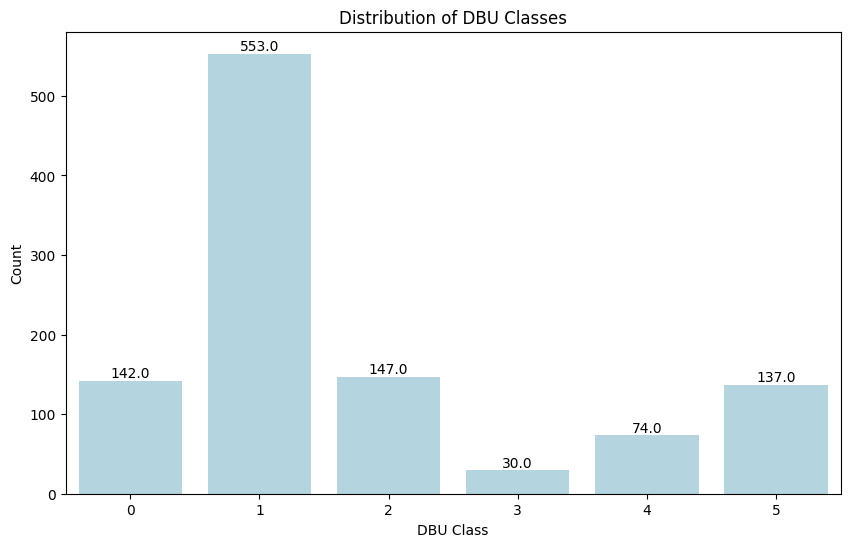

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data = df_filled_with_mean

plt.figure(figsize=(10, 6))

# Create a count plot
ax = sns.countplot(x='DBU Class', data=data, color='#ADD8E6')

# Add count values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Distribution of DBU Classes')
plt.xlabel('DBU Class')
plt.ylabel('Count')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np


X = df_filled_with_mean.drop('DBU Class', axis=1)
y = df_filled_with_mean['DBU Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Create a dictionary of hyperparameters to search over
param_grid = {
    'C': [0.1, 1, 0.01, 10],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
    'kernel': ['linear', 'rbf', 'poly'],
}

# Initialize the SVM classifier
clf = SVC()

# Create a grid search object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=20, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions on the scaled testing data
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.5977859778597786
Precision: 0.506951898754868
Recall: 0.5977859778597786
F1 Score: 0.5114391921712308


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.72      0.49      0.58        37
           1       0.58      0.95      0.72       131
           2       0.00      0.00      0.00        45
           3       0.00      0.00      0.00         4
           4       0.67      0.10      0.17        20
           5       0.64      0.53      0.58        34

    accuracy                           0.60       271
   macro avg       0.43      0.34      0.34       271
weighted avg       0.51      0.60      0.51       271



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


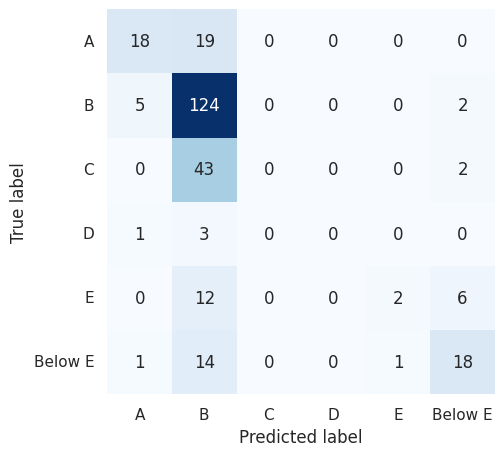

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
class_labels = ["A", "B", "C", "D", "E", "Below E"]
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.0)
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.yticks(rotation=0)
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Assuming you've already preprocessed your data and loaded it into a DataFrame df_filled_with_mean

# Separate features (X) and target (y)
X = df_filled_with_mean.drop('DBU Class', axis=1)  # Features
y = df_filled_with_mean['DBU Class']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a grid of hyperparameters to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization strength (smaller values mean stronger regularization)
    'penalty': ['l1', 'l2'],  # Type of regularization penalty (L1 or L2)
    'max_iter': [1000, 5000, 10000]  # Maximum number of iterations
}

# Initialize the Logistic Regression model
clf = LogisticRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Get the best model predictions
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Generate and print a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: So

Accuracy: 0.6892307692307692
Precision: 0.6580155856665701
Recall: 0.6892307692307692
F1 Score: 0.6623766680631252
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        46
           1       0.73      0.89      0.81       151
           2       0.51      0.44      0.48        54
           3       0.00      0.00      0.00         4
           4       0.43      0.12      0.19        24
           5       0.62      0.50      0.55        46

    accuracy                           0.69       325
   macro avg       0.52      0.47      0.48       325
weighted avg       0.66      0.69      0.66       325



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.80      0.85      0.82        46
           1       0.73      0.89      0.81       151
           2       0.51      0.44      0.48        54
           3       0.00      0.00      0.00         4
           4       0.43      0.12      0.19        24
           5       0.62      0.50      0.55        46

    accuracy                           0.69       325
   macro avg       0.52      0.47      0.48       325
weighted avg       0.66      0.69      0.66       325



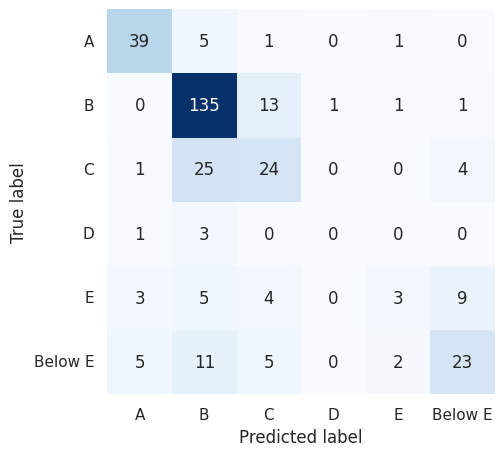

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
class_labels = ["A", "B", "C", "D", "E", "Below E"]
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.0)
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.yticks(rotation=0)
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you've already preprocessed your data and loaded it into a DataFrame df_filled_with_mean

# Separate features (X) and target (y)
X = df_filled_with_mean.drop('DBU Class', axis=1)  # Features
y = df_filled_with_mean['DBU Class']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=42)

# Define a grid of hyperparameters to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Experiment with different values
    'weights': ['uniform', 'distance'],  # Weighting scheme
    'p': [1, 2],  # Minkowski distance parameter (1 for Manhattan, 2 for Euclidean)
}

# Initialize the K-Nearest Neighbors classifier
clf = KNeighborsClassifier()

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Hyperparameters:", best_params)
print("Test Accuracy:", accuracy)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Best Model Hyperparameters: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Test Accuracy: 0.7306273062730627
Precision: 0.7081848690263015
Recall: 0.7306273062730627
F1 Score: 0.7129034514636461


              precision    recall  f1-score   support

           0       0.73      0.86      0.79        37
           1       0.79      0.85      0.82       131
           2       0.61      0.60      0.61        45
           3       0.00      0.00      0.00         4
           4       0.43      0.15      0.22        20
           5       0.75      0.71      0.73        34

    accuracy                           0.73       271
   macro avg       0.55      0.53      0.53       271
weighted avg       0.71      0.73      0.71       271



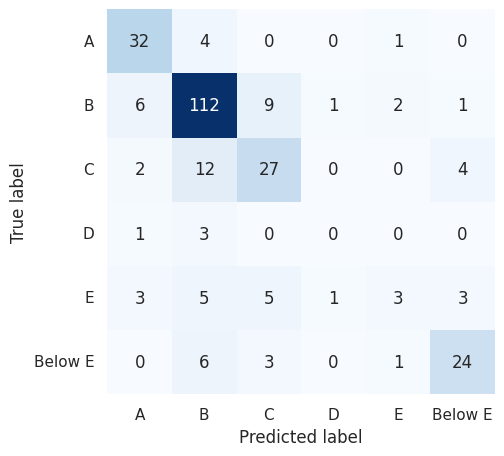

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
class_labels = ["A", "B", "C", "D", "E", "Below E"]
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.0)
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.yticks(rotation=0)
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
X = df_filled_with_mean.drop('DBU Class', axis=1)
y = df_filled_with_mean['DBU Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.tree import DecisionTreeClassifier
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy: 0.7723076923076924
Precision: 0.7662015037971912
Recall: 0.7723076923076924
F1 Score: 0.7639050171885303


              precision    recall  f1-score   support

           0       1.00      0.93      0.96        29
           1       0.87      0.90      0.88       101
           2       0.72      0.54      0.62        39
           3       0.25      0.25      0.25         4
           4       0.67      0.24      0.35        17
           5       0.48      0.81      0.60        27

    accuracy                           0.76       217
   macro avg       0.66      0.61      0.61       217
weighted avg       0.78      0.76      0.76       217



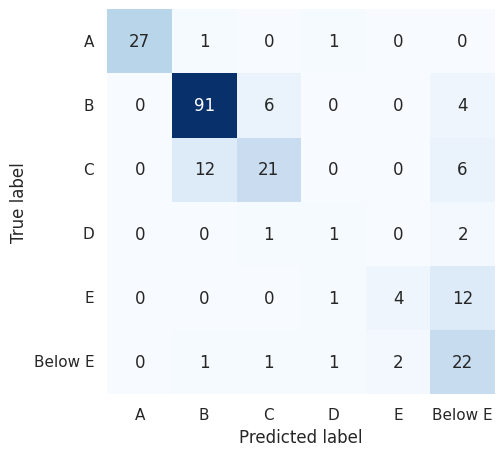

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
class_labels = ["A", "B", "C", "D", "E", "Below E"]
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.0)
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.yticks(rotation=0)
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load your dataset and preprocess it if needed
# df = pd.read_csv("/path/to/your/dataset.csv")

X = df_filled_with_mean.drop('DBU Class', axis=1)
y = df_filled_with_mean['DBU Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.8007380073800738
Precision: 0.7729736172034797
Recall: 0.8007380073800738
F1 Score: 0.7744988239682434


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.86      0.96      0.91        46
           1       0.83      0.94      0.88       151
           2       0.74      0.57      0.65        54
           3       0.00      0.00      0.00         4
           4       0.71      0.21      0.32        24
           5       0.66      0.76      0.71        46

    accuracy                           0.79       325
   macro avg       0.63      0.57      0.58       325
weighted avg       0.77      0.79      0.77       325



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


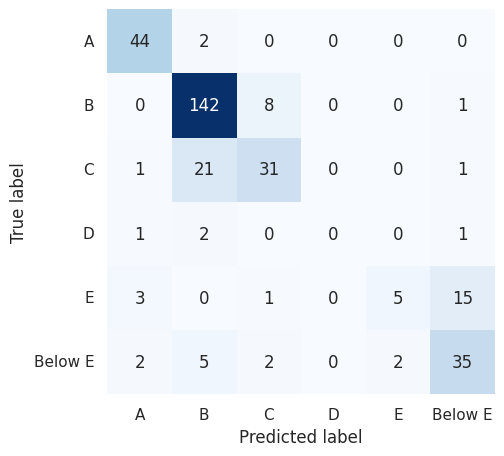

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
class_labels = ["A", "B", "C", "D", "E", "Below E"]
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.0)
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.yticks(rotation=0)
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load your dataset and preprocess it if needed
# df = pd.read_csv("/path/to/your/dataset.csv")

X = df_filled_with_mean.drop('DBU Class', axis=1)
y = df_filled_with_mean['DBU Class']
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}
clf = xgb.XGBClassifier(random_state=42)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.8123076923076923
Precision: 0.7971393553602836
Recall: 0.8123076923076923
F1 Score: 0.8008267261487201


              precision    recall  f1-score   support

           0       0.92      0.96      0.94        46
           1       0.86      0.93      0.89       151
           2       0.74      0.72      0.73        54
           3       0.00      0.00      0.00         4
           4       0.56      0.21      0.30        24
           5       0.66      0.72      0.69        46

    accuracy                           0.80       325
   macro avg       0.62      0.59      0.59       325
weighted avg       0.79      0.80      0.79       325



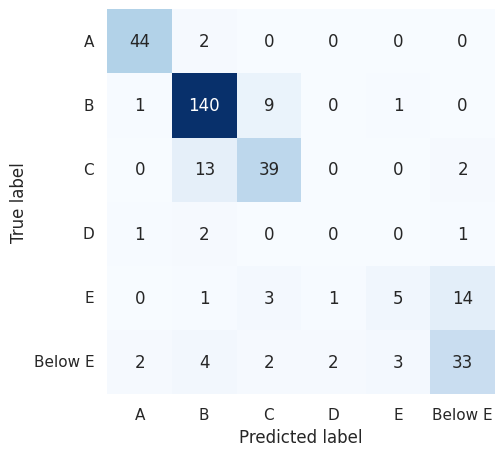

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
class_labels = ["A", "B", "C", "D", "E", "Below E"]
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.0)
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.yticks(rotation=0)
plt.show()

In [ ]:
pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load your dataset and preprocess it if needed
# df = pd.read_csv("/path/to/your/dataset.csv")

X = df_filled_with_mean.drop('DBU Class', axis=1)
y = df_filled_with_mean['DBU Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
from catboost import CatBoostClassifier
param_grid = {
    'iterations': [100, 500, 1000],
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}
clf = CatBoostClassifier(random_state=42, verbose=0)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Hyperparameters: {'depth': 8, 'iterations': 500, 'learning_rate': 0.1}
Accuracy: 0.8265682656826568
Precision: 0.818431352372701
Recall: 0.8265682656826568
F1 Score: 0.8101397591247307


              precision    recall  f1-score   support

           0       0.95      0.97      0.96        37
           1       0.89      0.94      0.91       131
           2       0.79      0.76      0.77        45
           3       1.00      0.25      0.40         4
           4       0.50      0.15      0.23        20
           5       0.60      0.79      0.68        34

    accuracy                           0.83       271
   macro avg       0.79      0.64      0.66       271
weighted avg       0.82      0.83      0.81       271



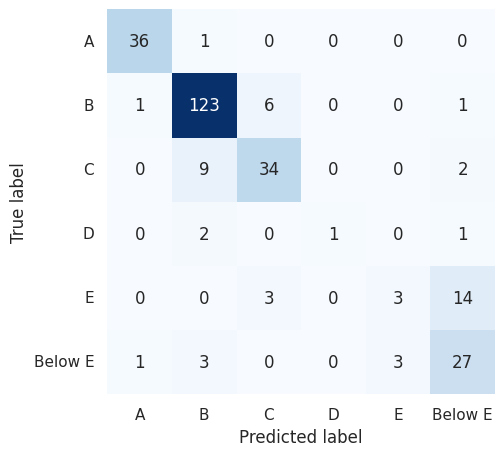

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
class_labels = ["A", "B", "C", "D", "E", "Below E"]
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.0)
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.yticks(rotation=0)
plt.show()

**WQI**

In [ ]:
Si_values = [10, 8.5, 1000, 5, 45, 100, 1000]
wi_values = [0.2213, 0.2604, 0.0022, 0.4426, 0.0492, 0.0221, 0.0022]
Videal_values = [14.6, 7.0, 0, 0, 0, 0, 0]

numeric_columns = ['D.O\n', 'Ph', 'Conductivity\n',
       'BOD\n', 'Nitrate\n', 'Fecal coliform\n',
       'Total coliform\n']
qi_values = 100 * (df_filled_with_mean[numeric_columns].values - np.array(Videal_values)) / (np.array(Si_values) - np.array(Videal_values))

WQI_values = (qi_values * np.array(wi_values)).sum(axis=1) / sum(wi_values)

df_filled_with_mean['wqi'] = WQI_values

print(df_filled_with_mean)

      RIVER NAME  Name of station     D.O\n   Ph  Conductivity\n  BOD\n  \
0              0                1  8.000000  9.0           463.0    1.4   
1              0                2  8.000000  8.0           488.0    1.2   
3              0                3  7.000000  8.0           692.0    1.1   
4              0                4  6.800000  7.1           139.0    0.8   
5              0                5  7.100000  7.1           221.0    1.2   
...          ...              ...       ...  ...             ...    ...   
1352           2               47  6.276471  7.8           288.0   12.0   
1353           2               48  6.700000  8.2           723.0    2.0   
1354           2               49  6.500000  8.2           420.0    2.0   
1355           2               50  6.500000  8.2           884.0    2.0   
1356           2               73  6.400000  8.3         40330.0    2.0   

      Nitrate\n  Nitrite\n  Fecal coliform\n  Total coliform\n  ...  Sodium\n  \
0      0.166667   

In [ ]:
df_filled_with_mean["WQI clf"] = df_filled_with_mean["wqi"].apply(lambda x: (3 if (x <= 25)
                                        else(2 if (26<=x<=50)
                                        else(1 if (51<=x<=75)
                                        else 0))))
df_filled_with_mean


,RIVER NAME,Name of station,D.O\n,Ph,Conductivity\n,BOD\n,Nitrate\n,Nitrite\n,Fecal coliform\n,Total coliform\n,...,Total Dissolved Solids\n,Total Fixed Solids\n,Total Suspended Solids\n,Phosphate\n,Boron\n,Potassium\n,Fluoride\n,DBU Class,wqi,WQI clf
0,0,1,8.000000,9.0,463.0,1.4,0.166667,0.280600,39.000000,220.0,...,368.0,300.0,4.0,0.157059,0.006,5.0,0.510000,1,79.894921,0
1,0,2,8.000000,8.0,488.0,1.2,0.338421,0.317150,430.000000,1400.0,...,372.0,312.0,4.0,0.247500,0.006,5.0,0.420000,2,69.689500,1
3,0,3,7.000000,8.0,692.0,1.1,0.345000,0.046500,430.000000,1200.0,...,512.0,500.0,8.0,0.200000,0.006,8.0,0.420000,2,73.616769,1
4,0,4,6.800000,7.1,139.0,0.8,0.182412,0.020278,27.000000,130.0,...,108.0,96.0,4.0,0.114588,0.006,2.0,0.420000,1,47.018206,2
5,0,5,7.100000,7.1,221.0,1.2,0.408722,0.052222,120.000000,350.0,...,184.0,160.0,4.0,0.147000,0.006,3.0,0.250000,1,51.262229,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352,2,47,6.276471,7.8,288.0,12.0,0.170000,0.010000,220.000000,540.0,...,248.0,192.0,96.0,0.040000,0.006,4.3,1.000000,4,165.218161,0
1353,2,48,6.700000,8.2,723.0,2.0,1.383333,0.089000,240.666667,78.0,...,418.0,290.0,12.0,0.040000,0.006,7.8,0.532000,1,82.188067,0
1354,2,49,6.500000,8.2,420.0,2.0,1.250000,0.145000,119.400000,92.0,...,244.0,172.0,8.0,0.000000,0.006,4.6,0.345000,1,80.392090,0
1355,2,50,6.500000,8.2,884.0,2.0,1.633333,0.600000,156.266667,61.0,...,512.0,284.0,10.0,0.000000,0.000,12.0,0.432857,1,81.344015,0


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
X = df_filled_with_mean.drop(columns=['WQI clf','DBU Class'])
y = df_filled_with_mean['WQI clf']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
param_grid = {
'C': [0.1, 1, 0.01, 10],
'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
'kernel': ['linear', 'rbf', 'poly'],
}
clf = SVC()
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=20,
scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=20.
  warnings.warn(


Accuracy: 0.6338461538461538
Precision: 0.6475815912122166
Recall: 0.6338461538461538
F1 Score: 0.619992779363976


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
X = df_filled_with_mean.drop(columns=['WQI clf','DBU Class'])
y = df_filled_with_mean['WQI clf']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Accuracy: 0.75
Precision: 0.75
Recall: 0.75
F1-Score: 0.73


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X = df_filled_with_mean.drop(columns=['WQI clf','DBU Class'])
y = df_filled_with_mean['WQI clf']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.74
Precision: 0.74
Recall: 0.74
F1-Score: 0.74


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Load your dataset and define X and y as you did before
X = df_filled_with_mean.drop(columns=['WQI clf','DBU Class'])
y = df_filled_with_mean['WQI clf']

# Create a Decision Tree classifier
tree_classifier = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)

# Define the evaluation metrics you want to compute during cross-validation
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted', zero_division=1),
    'recall': make_scorer(recall_score, average='weighted', zero_division=1),
    'f1': make_scorer(f1_score, average='weighted', zero_division=1)
}

cv_results = cross_validate(tree_classifier, X, y, cv=10, scoring=scoring)

# Print the results with format specifiers
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean():.2f}")
print(f"Mean Precision: {cv_results['test_precision'].mean():.2f}")
print(f"Mean Recall: {cv_results['test_recall'].mean():.2f}")
print(f"Mean F1-Score: {cv_results['test_f1'].mean():.2f}")


Mean Accuracy: 0.99
Mean Precision: 1.00
Mean Recall: 0.99
Mean F1-Score: 0.99


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
X = df_filled_with_mean.drop(columns=['WQI clf','DBU Class'])
y = df_filled_with_mean['WQI clf']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy*100}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 99.38461538461539
Precision: 0.99
Recall: 0.99
F1-Score: 0.99


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load your dataset
# Replace 'your_data.csv' with the actual path to your dataset

# Assuming you already have X and y defined as in your original code

# Split the data into training and testing sets
X = df_filled_with_mean.drop(columns=['WQI clf','DBU Class'])
y = df_filled_with_mean['WQI clf']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Fit the model to the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test)

# Calculate various classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1-Score: 0.99


In [ ]:
pip install catboost


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load your dataset
# Replace 'your_data.csv' with the actual path to your dataset
X = df_filled_with_mean.drop(columns=['WQI clf','DBU Class'])
y = df_filled_with_mean['WQI clf']
# Assuming you already have X and y defined as in your original code

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a CatBoost classifier for multi-class classification
catboost_classifier = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, loss_function='MultiClass')

# Fit the model to the training data
catboost_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = catboost_classifier.predict(X_test)

# Calculate various classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

0:	learn: 1.1567139	total: 72.1ms	remaining: 36s
1:	learn: 1.0357621	total: 96.9ms	remaining: 24.1s
2:	learn: 0.9017908	total: 129ms	remaining: 21.4s
3:	learn: 0.7896101	total: 147ms	remaining: 18.2s
4:	learn: 0.6994849	total: 164ms	remaining: 16.3s
5:	learn: 0.6259053	total: 181ms	remaining: 14.9s
6:	learn: 0.5641539	total: 197ms	remaining: 13.9s
7:	learn: 0.5071312	total: 214ms	remaining: 13.2s
8:	learn: 0.4644054	total: 231ms	remaining: 12.6s
9:	learn: 0.4198089	total: 247ms	remaining: 12.1s
10:	learn: 0.3886311	total: 266ms	remaining: 11.8s
11:	learn: 0.3595090	total: 289ms	remaining: 11.7s
12:	learn: 0.3322400	total: 314ms	remaining: 11.8s
13:	learn: 0.3030795	total: 341ms	remaining: 11.8s
14:	learn: 0.2778974	total: 374ms	remaining: 12.1s
15:	learn: 0.2582585	total: 406ms	remaining: 12.3s
16:	learn: 0.2390996	total: 437ms	remaining: 12.4s
17:	learn: 0.2211860	total: 470ms	remaining: 12.6s
18:	learn: 0.2068740	total: 507ms	remaining: 12.8s
19:	learn: 0.1928818	total: 540ms	remaini

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
features = ['D.O\n', 'Ph', 'Conductivity\n', 'BOD\n', 'Nitrite\n', 'Fecal coliform\n', 'Total coliform\n']
target = 'wqi'
X_train, X_test, y_train, y_test = train_test_split(df_filled_with_mean[features], df_filled_with_mean[target], test_size=0.3, random_state=42)
# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression Metrics:")
print("MAE:", mae_lr)
print("MSE:", mse_lr)
print("RMSE:", rmse_lr)
print("R²:", r2_lr)
# Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("\nRidge Regression Metrics:")
print("MAE:", mae_ridge)
print("MSE:", mse_ridge)
print("RMSE:", rmse_ridge)
print("R²:", r2_ridge)
# Lasso Regression model
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("\nLasso Regression Metrics:")
print("MAE:", mae_lasso)
print("MSE:", mse_lasso)
print("RMSE:", rmse_lasso)
print("R²:", r2_lasso)


Linear Regression Metrics:
MAE: 0.08146410841994457
MSE: 0.04219823906933689
RMSE: 0.20542209975885478
R²: 0.9999999939070898

Ridge Regression Metrics:
MAE: 0.08144736759861798
MSE: 0.04252695897116486
RMSE: 0.20622065602447506
R²: 0.9999999938596267

Lasso Regression Metrics:
MAE: 1.4295015509234745
MSE: 77.12991935643112
RMSE: 8.78236410976174
R²: 0.9999888633819429
